In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Purpose of the Project
The primary goal of this project is to extract meaningful insights from the Netflix dataset to enhance understanding of the streaming service's content strategy, audience preferences, and market trends. The analysis is geared towards providing data-driven insights to support decision-making for content creators, marketers, and platform strategists. From an educational perspective, individuals or teams conducting the analysis have the opportunity to develop and showcase skills in data analysis, visualization, and interpretation.

# Objectives of the Data Analysis Projec
* Content Distribution: To analyze the distribution of different types of content (movies, TV shows) on Netflix.
* Genre Analysis: To explore which genres are most prevalent on Netflix
* Temporal Trends: To examine how Netflix content has evolved over the years.
* Audience and Rating Analysis: To understand the target audience of Netflix content.
* Regional Preferences: To investigate if certain countries or regions have specific preferences or produce distinct types of content.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Preprocessing
The purpose of this section is to clearly document how I load the Netflix dataset into your analysis environment and the preprocessing steps I undertake to prepare the data for analysis. This section is crucial as it sets the foundation for my entire analysis.

In [3]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#information of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#find out the outlier, can be only applied to numeric values
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Text(0.5, 0, 'Release Year')

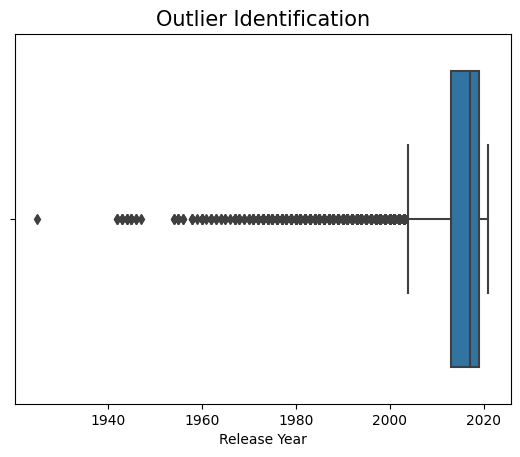

In [6]:
#Showing outliers in boxplot
sns.boxplot(x=df['release_year'])
plt.title('Outlier Identification', fontsize=15 )
plt.xlabel('Release Year', fontsize=10)

In [7]:
#Defining the Quartiles for removal of outliers
Q1=df['release_year'].quantile(0.25)
Q3=df['release_year'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((df['release_year']<lowoutlier)|(df['release_year']>highoutlier)).sum()
totaloutlier

719

In [8]:
df_filter=df[(df['release_year']<highoutlier)&(df['release_year']>lowoutlier)]
df_filter.describe()

,release_year
count,8024.000000
mean,2016.403664
std,3.637431
min,2005.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
#validating the removal of outlier
totaloutlier = ((df_filter['release_year'] < lowoutlier) | (df_filter['release_year'] > highoutlier)).sum()
print("Total Number of Outliers in the release_year are {}".format(totaloutlier))

Total Number of Outliers in the release_year are 0


In [10]:
df_filter.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
df_filter=df_filter.fillna('No Data')

In [12]:
# Since date_added column is of object data type , thus converting it to datetime format
df_filter["date_added"] = pd.to_datetime(df_filter['date_added'], format='%B %d, %Y', errors='coerce')
df_filter['Year_added']=df_filter['date_added'].dt.year
df_filter.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [13]:
#Checking the unique values of the dataframe
df_filter.nunique()

show_id         8024
type               2
title           8024
director        4177
cast            6949
country          702
date_added      1685
release_year      17
rating            18
duration         202
listed_in        463
description     7996
Year_added        13
dtype: int64

In [14]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8024 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8024 non-null   object        
 1   type          8024 non-null   object        
 2   title         8024 non-null   object        
 3   director      8024 non-null   object        
 4   cast          8024 non-null   object        
 5   country       8024 non-null   object        
 6   date_added    7934 non-null   datetime64[ns]
 7   release_year  8024 non-null   int64         
 8   rating        8024 non-null   object        
 9   duration      8024 non-null   object        
 10  listed_in     8024 non-null   object        
 11  description   8024 non-null   object        
 12  Year_added    7934 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 877.6+ KB


# Data Visualisation

# Content Type distribution: 

We will evaluate Netflix's focus area of content type between TV Shows and movies in recent years.

In [15]:
df_filter['type'].value_counts()

type
Movie      5432
TV Show    2592
Name: count, dtype: int64

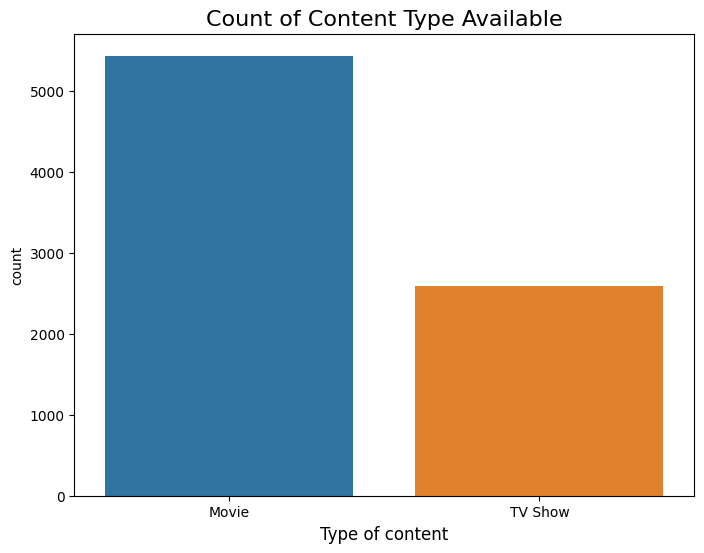

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_filter, x='type')
plt.title('Count of Content Type Available', fontsize = 16)
plt.xlabel('Type of content', fontsize=12)
plt.show()

This bar plot shows the distribution of content types (movies and TV shows) on Netflix. 

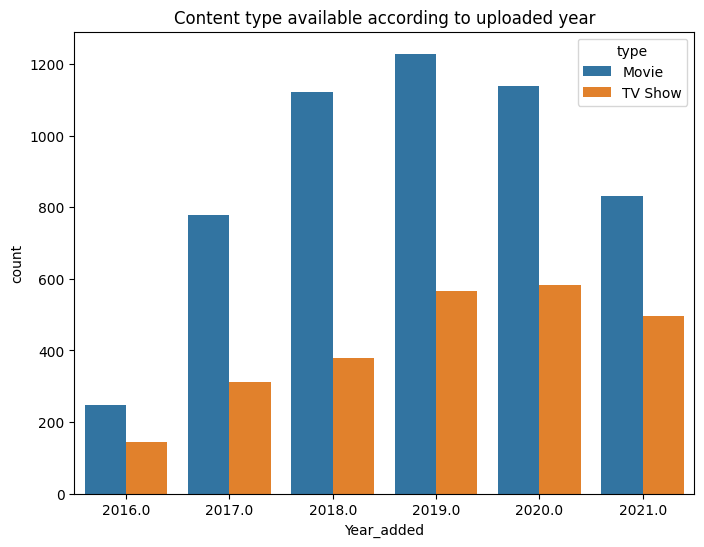

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_filter[(df_filter.Year_added>2015)],x='Year_added', hue='type')
plt.title('Content type available according to uploaded year')
plt.xlabel('Year_added')
plt.show()

Netflix has more movies than TV shows in recent years after 2016 and this proportion has evolved over time.

But the ratio of movies and TV shows of each year are getting close after year 2019.

Insight: Note the balance between movies and TV shows. A higher number of movies could suggest a focus on diverse, one-time content, while more TV shows might indicate a strategy to keep viewers engaged over longer periods.

# Content availibility in different countries

Text(0.5, 1.0, 'Count of content in different countries')

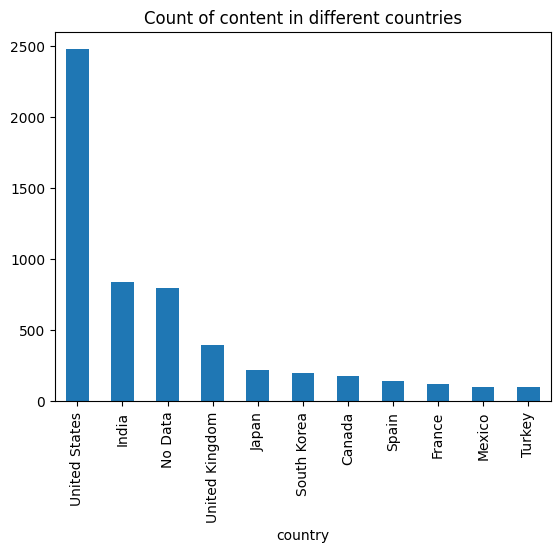

In [18]:
df_filter['country'].value_counts()[:11].plot(kind='bar')
plt.title('Count of content in different countries')

In [19]:
# filter out 'No Data'
df_top10=df_filter.query('country == ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Mexico","Turkey"]')

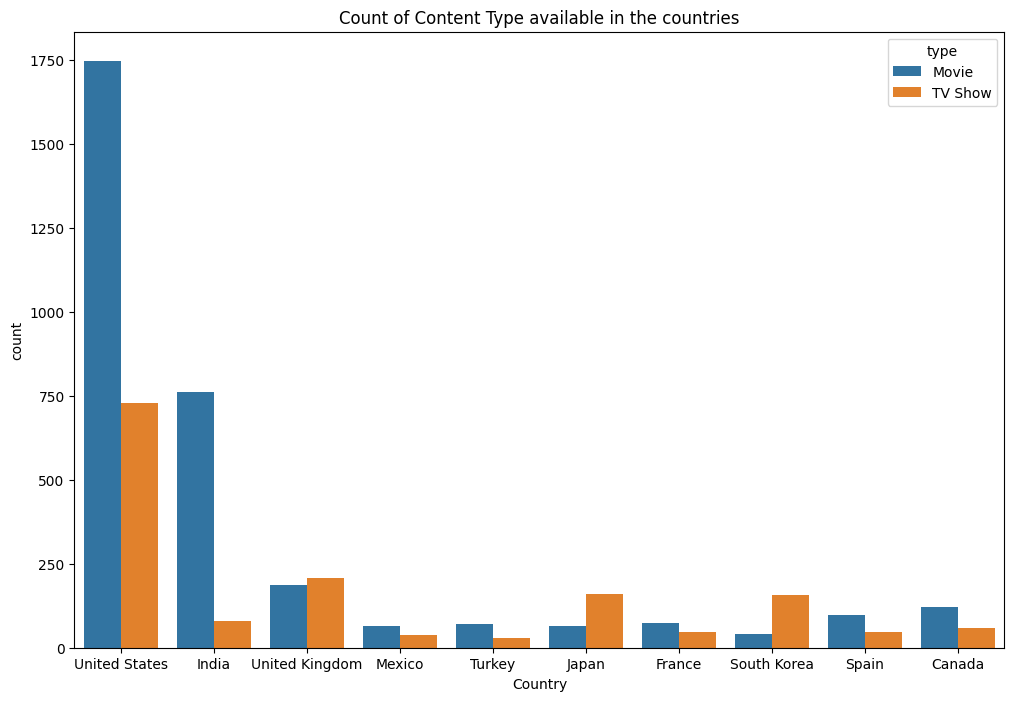

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_top10,x='country', hue='type')
plt.title('Count of Content Type available in the countries')
plt.xlabel('Country')
plt.show()

The above plot represents the content according to their types, it can be inference that Japan, South Korea and the United Kingdom are the only countries in which TV shows have more content than movies; it can be thought of as the people tend to watch more TV shows than movies in these countries. In contrast, the content available on Netflix is majorly movies.

# Rating Type distribution



Text(0.5, 1.0, 'Count of content in different rating')

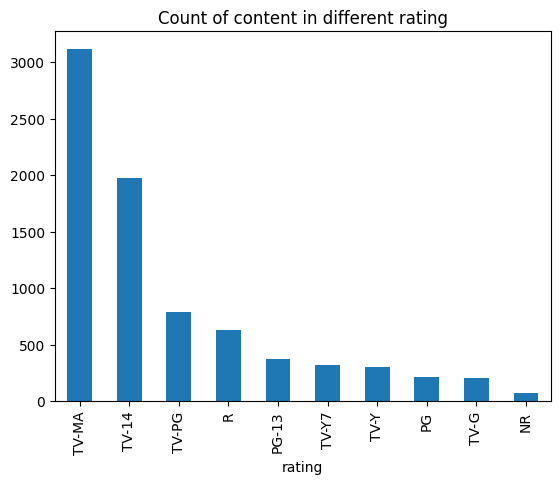

In [21]:
df_filter['rating'].value_counts()[:10].plot(kind='bar')
plt.title('Count of content in different rating')

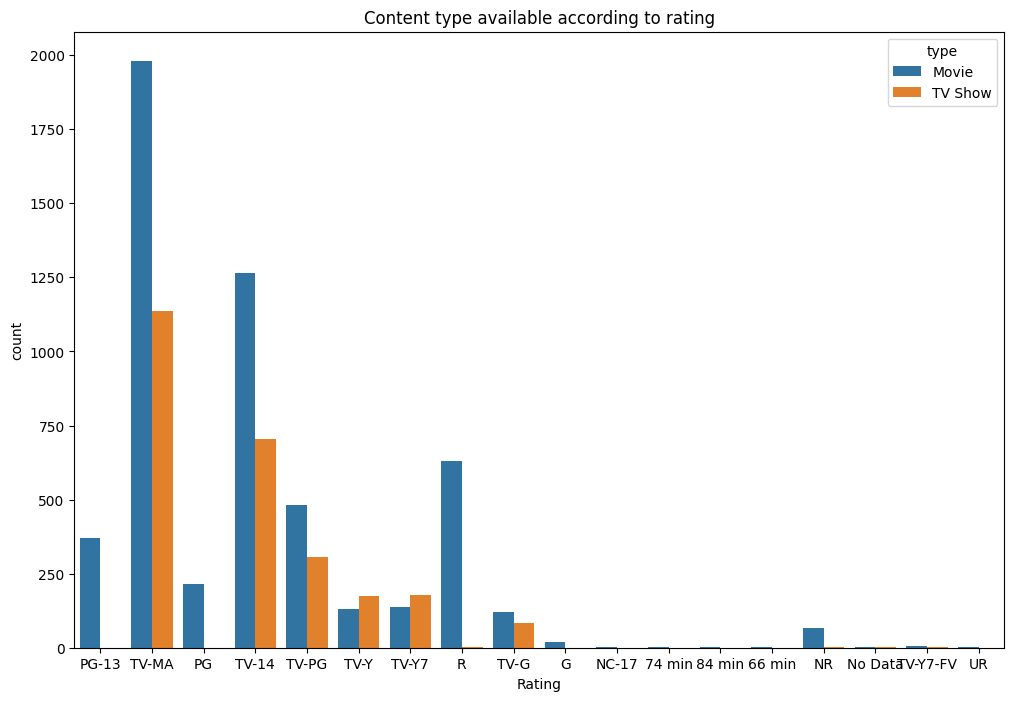

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_filter,x='rating', hue='type')
plt.title('Content type available according to rating')
plt.xlabel('Rating')
plt.show()

Here, we visualize the distribution of content ratings. This plot is essential to understand the target audience for Netflix content and how it aligns with the platform's content strategy.

Insight: Analyze the prevalence of different ratings (e.g., PG, R). A concentration of mature content might suggest targeting an older audience, while more family-friendly ratings indicate a broader target demographic.

This information can be beneficial to the industry leader in deciding the distribution of content in respect of the rating of viewers according to the available content. Additionally, it is helpful for people to analyse the movies and tv shows content in respect of the rating they got from the authorized certification committee.

# Movie and TV show duration analysis

In [23]:
#Movie duration analysis
df_filter[df_filter['type']=="Movie"]['duration'].value_counts().sort_values(ascending=False)[:20]

duration
90 min     142
97 min     137
91 min     136
93 min     131
94 min     125
92 min     124
95 min     124
96 min     117
102 min    110
98 min     109
99 min     106
88 min     103
103 min    100
100 min     99
106 min     99
86 min      98
101 min     98
87 min      96
107 min     93
89 min      91
Name: count, dtype: int64

Most movies in Netflix have a duration of 88-106 mins.

In [24]:
#TV shows season analysis
df_filter[df_filter['type']=="TV Show"]['duration'].value_counts().sort_values(ascending=False)

duration
1 Season      1744
2 Seasons      417
3 Seasons      198
4 Seasons       89
5 Seasons       61
6 Seasons       29
7 Seasons       18
8 Seasons       16
9 Seasons        8
10 Seasons       4
13 Seasons       3
15 Seasons       2
12 Seasons       2
17 Seasons       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of TV shows in different seasons')

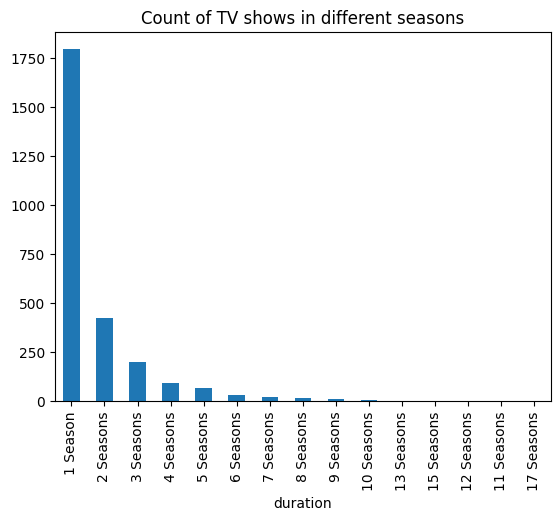

In [25]:
df[df['type']=="TV Show"]['duration'].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title('Count of TV shows in different seasons')

Netflix TV shows has mostly 1 - 3 seasons

# Categorical or Genre distribution

What are the most frequently appearing categories in Netflix movies?

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of content in different genre')

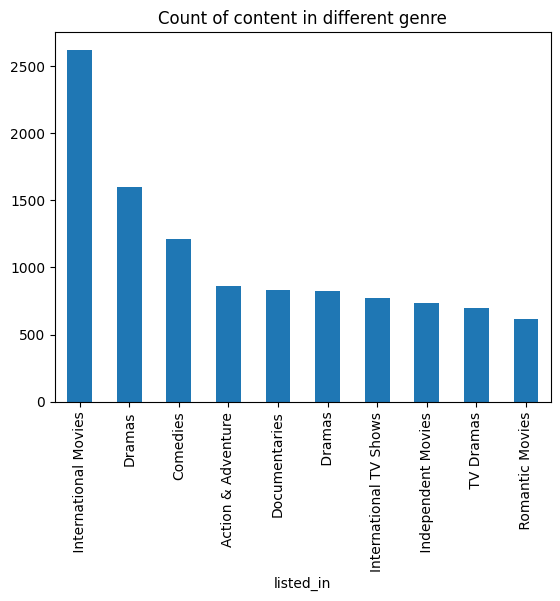

In [26]:
df_filter['listed_in'] = df_filter['listed_in'].str.replace(' ', '')
genre_counts = df['listed_in'].str.split(',').explode().value_counts()[:10]
print(genre_counts)
genre_counts = df['listed_in'].str.split(',').explode().value_counts()[:10].plot(kind='bar')
plt.title('Count of content in different genre')

International Movies, Dramas & Comedies are most popular genre in Netflix.

# Identifying most similar content in Netflix

We will use matching text-based feature

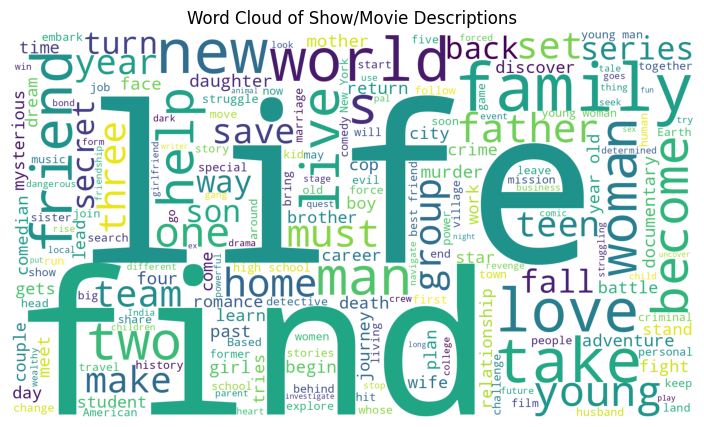

In [27]:
from wordcloud import WordCloud
plt.subplots(figsize=(10,5))
wordcloud=WordCloud(width=1920,
                   height=1080,
                   background_color='white').generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Show/Movie Descriptions')
plt.show()

# Comparison Between Release Year and Year Added to Netflix
Comparing these two metrics can reveal how quickly Netflix is able to add new content to its platform. For instance, a narrowing gap over time might suggest improvements in acquisition and licensing processes or a shift towards more original content that is available immediately upon release.

In [28]:
#create new column 'year_gap' to analyse the uploading strategy
df_filter['year_gap']= df_filter['Year_added']-df_filter['release_year']
df_gap10=df_filter['year_gap'].value_counts()[:10]
df_gap10

year_gap
0.0     3222
1.0     1559
2.0      707
3.0      484
4.0      358
5.0      260
6.0      247
8.0      183
7.0      183
9.0      160
11.0     134
10.0     134
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

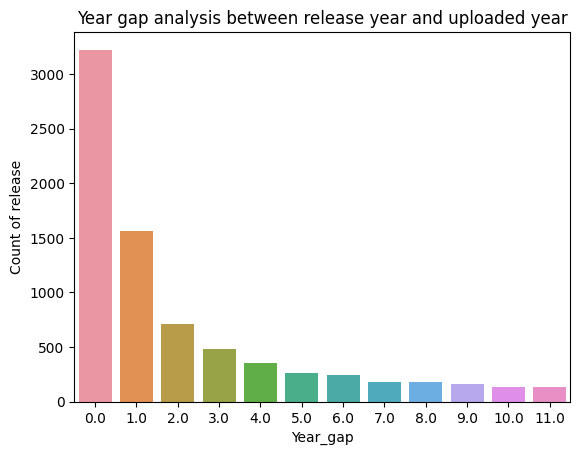

In [29]:
#data in visualization
sns.barplot(x=df_gap10.index, y=df_gap10)
plt.title('Year gap analysis between release year and uploaded year')
plt.xlabel('Year_gap')
plt.ylabel('Count of release')
plt.show

Most contents are uploaded in the same year and next year of release that suggest improvements in acquisition and licensing processes or a shift towards more original content that is available immediately upon release.

# Conclusion & Discussion

The Netflix dataset was thoroughly cleaned and prepared to ensure the dependability of our data-driven insights. This involved addressing outliers, handling missing values, and eliminating duplicate records.

The analysis unfolded in three main stages: Data Exploration, Data Cleaning, and Data Visualization. These stages played a pivotal role in revealing valuable insights about the distribution of content on Netflix, addressing key business questions and challenges.

Key findings encompassed insights into the distribution of content types, country-specific content preferences, and the popularity of content across different ratings. Additionally, we delved into content duration, distinguishing between TV show seasons and movie lengths. 

In conclusion, this analysis furnishes comprehensive insights into popular content ratings, preferences across diverse countries, and content duration preferences. These discoveries are essential for industry advisors and decision-makers in shaping strategies for content acquisition, creation, and distribution on the platform.